In [2]:
!pip install mysql-connector-python

You should consider upgrading via the 'c:\users\alan\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


## Pipline for MySQL insertion

In [ ]:
import mysql.connector
import pandas as pd
import time

# Connect to MySQL server
mydb = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="your_password",
    database="your_database",
)



# Replace 'table_name' with the name of the table you want to load the data into.
table_name = 'twitter1600000'

# Read CSV into a Pandas dataframe
start_time = time.time()
df = pd.read_csv('first_1600000.csv') # csv shoud change to the give scale for testing

# print(f"CSV file read in {time.time() - start_time:.2f} seconds.")

# # Define the CREATE TABLE statement
# create_table = f'''
# CREATE TABLE {table_name} (
#   target VARCHAR(255),
#   ids VARCHAR(255),
#   date VARCHAR(255),
#   flag VARCHAR(255),
#   user VARCHAR(255),
#   text TEXT
# )
# '''

# # Create the table
# cursor = mydb.cursor()
# cursor.execute(create_table)

# Insert each row from the dataframe into MySQL

rows =[]
for _, row in df.iterrows():
    rows.append(tuple(row))
    placeholders = ', '.join(['%s'] * len(row))
    
# Replace 'table_name' with the name of the table you want to load the data into.
# sql = f"LOAD DATA INFILE 'first_1600.csv' INTO TABLE {table_name} FIELDS TERMINATED BY ',' ENCLOSED BY '\"' LINES TERMINATED BY '\\n' IGNORE 1 ROWS"

# cursor.execute(sql)
# sql = f"INSERT INTO {table_name} VALUES ({placeholders})"
# cursor = mydb.cursor()
# cursor.executemany(sql, rows)
# mydb.commit()

start_time = time.time()
for i in range(0,len(rows), 20000):
    if i+20000 <= len(rows):
        row = rows[i:i+20000]
    else:
        row = row[i:]
    sql = f"INSERT INTO {table_name} VALUES ({placeholders})"
    cursor = mydb.cursor()
    cursor.executemany(sql, row)
    mydb.commit()

print(f"{len(df)} rows inserted in {time.time() - start_time:.2f} seconds.")

# Close the database connection
mydb.close()

## Pipline for MongoDB insertion

In [4]:
!pip install pymongo

You should consider upgrading via the 'c:\users\alan\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
from pymongo import MongoClient

client = MongoClient("localhost:27017")
db = client["your_database"]

# Replace 'table_name' with the name of the table you want to load the data into.
table_name = "your_table_name" 
collection = db[table_name]

rows = []
start_time = time.time()
df = pd.read_csv('first_160000.csv') # csv shoud change to the give scale for testing
for _, row in df.iterrows():
    new_row = {
            "target": row["target"],
            "ids": row["ids"],
            "date": row["date"],
            "flag": row["flag"],
            "user": row["user"],
            "text": row["text"]
        }
    rows.append(new_row)
    placeholders = ', '.join(['%s'] * len(row))

start_time = time.time()
#Insert all rows into the MongoDB collection
for i in range(0,len(rows), 20000):
    if i+20000 <= len(rows):
        row = rows[i:i+20000]
    else:
        row = row[i:]
    collection.insert_many(row)

# collection.insert_many(rows)
print(f"{len(df)} rows inserted in {time.time() - start_time:.3f} seconds.")
  

client.close()

##  Pipline for mysql read data

In [106]:
import mysql.connector
import pandas as pd
import time

# Connect to MySQL server
mydb = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="your_password",
    database="your_database",
)

# create a cursor object
cursor = mydb.cursor()

start_time = time.time()
sql = "SELECT * FROM twitter1600000" # Replace 'table_name' with the name of the table you want to read the data.
cursor.execute(sql)
# fetch all rows from the cursor
rows = cursor.fetchall()
print(len(rows))
end = time.time()
print(f" rows find in {end - start_time:.3f} seconds.")

1600000
 rows find in 4.135 seconds.


## Pipline for mongoDB read data

In [39]:
from pymongo import MongoClient


client = MongoClient("localhost:27017")
db = client["nosql"]
table_name = "table1600000"  #Replace 'table_name' with the name of the table you want to read the data.
collection = db[table_name]



start_time = time.time()
documents = collection.find()

for document in documents.batch_size(1000):
    pass

end = time.time()
print(f" rows find in {end - start_time:.3f} seconds.")



 rows find in 4.600 seconds.


## Update and Delete are  perform on MySQL workbench and MongoDB shell

## Result of update in mysql workbench

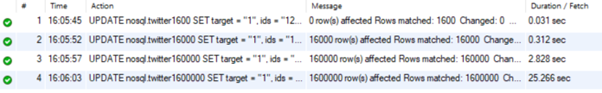

## Result of update in mongo db shell

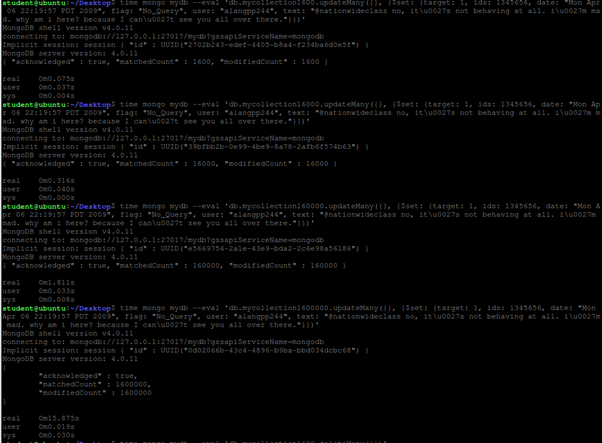

## Result of delete in MySQL workbench

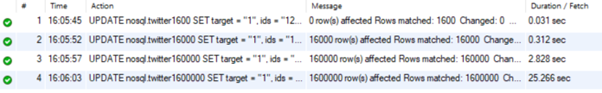

## Result of delete in mongo db shell

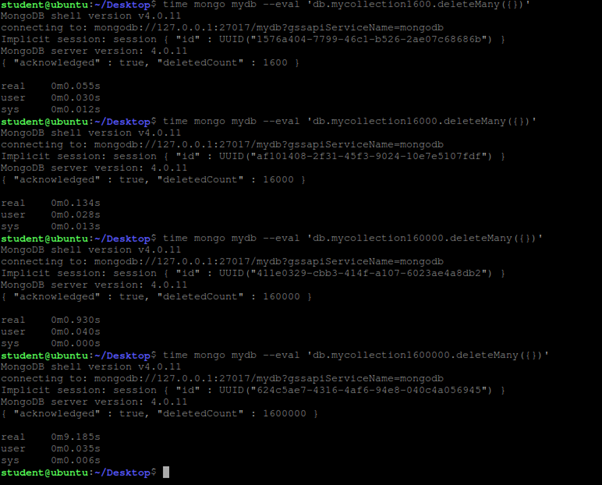